In [12]:
import torch
from torchvision import transforms
from PIL import Image
from torchvision.models.segmentation import deeplabv3_resnet101
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

In [13]:
# Load the DeepLabV3 model
model = deeplabv3_resnet101(pretrained=True)

In [14]:
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [15]:
# Transform the input image
transform = transforms.Compose([
    transforms.ToTensor(),
])

In [16]:
# Load and transform the image
image_path = r"D:\shutterstock_1095001973.webp"

In [17]:
image = Image.open(image_path).convert('RGB')

In [18]:
input_tensor = transform(image).unsqueeze(0)

In [19]:
# Perform inference
with torch.no_grad():
    output = model(input_tensor)['out'][0]

In [20]:
# Convert the output to a binary mask
mask = output.argmax(0).cpu().numpy()

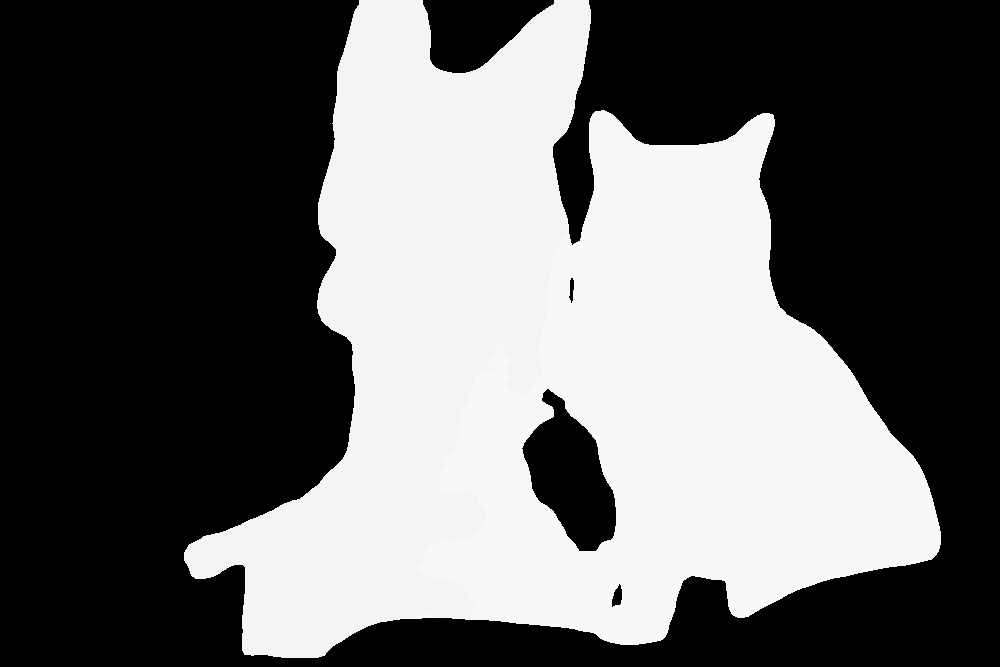

In [37]:
# Display the binary mask[.astype("uint8")]
binary_mask = (mask * 255).astype('uint8')
mask_image = Image.fromarray(binary_mask)
display(mask_image)

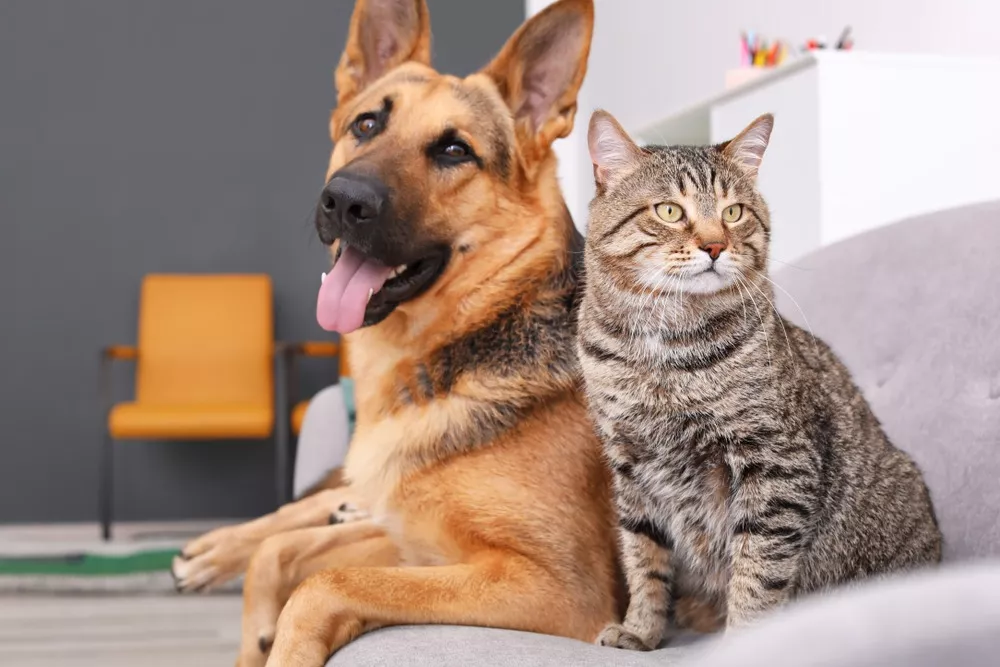

In [24]:
# Display the original image
display(image)